In [1]:
import numpy as np 
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
URLens = 'https://weather.rsmas.miami.edu/repository/opendap/synth%3A88c07b73-cf8d-4426-9254-16c8e75c2811%3AL0dFRlNfR2xvYmFsXzFwMGRlZ19FbnNlbWJsZV8yMDE3MDkwNF8xODAwLmdyaWIy/entry.das'
ds = xr.open_dataset(URLens)

OSError: [Errno -70] NetCDF: DAP server error: b'https://weather.rsmas.miami.edu/repository/opendap/synth%3A88c07b73-cf8d-4426-9254-16c8e75c2811%3AL0dFRlNfR2xvYmFsXzFwMGRlZ19FbnNlbWJsZV8yMDE3MDkwNF8xODAwLmdyaWIy/entry.das'

In [3]:
URLder = 'https://weather.rsmas.miami.edu/repository/opendap/synth%3A88c07b73-cf8d-4426-9254-16c8e75c2811%3AL0dFRlNfR2xvYmFsXzFwMGRlZ19FbnNlbWJsZV9kZXJpdmVkXzIwMTcwOTA0XzE4MDAuZ3JpYjI%3D/entry.das'
ds_der = xr.open_dataset(URLder)

OSError: [Errno -70] NetCDF: DAP server error: b'https://weather.rsmas.miami.edu/repository/opendap/synth%3A88c07b73-cf8d-4426-9254-16c8e75c2811%3AL0dFRlNfR2xvYmFsXzFwMGRlZ19FbnNlbWJsZV9kZXJpdmVkXzIwMTcwOTA0XzE4MDAuZ3JpYjI%3D/entry.das'

In [ ]:
ds_der = xr.open_dataset(URLder)
ds_der

In [ ]:
ds

In [ ]:
SLPmins = []

In [ ]:
# Region, landfall time

roi = ds.sel(lon=slice(360-90,360-70), lat=slice(35,20)) 
landfall = roi.sel(time2='2017-09-11 00:00:00')

In [ ]:
projection = ccrs.PlateCarree()
f, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=[12,10])

ax.coastlines();

for iens in range(21):
    SLP = landfall.Pressure_reduced_to_MSL_msl_ens[iens]
    contours = SLP.plot.contour(ax=ax,colors='k', vmin=99000,vmax=99000,levels=1)
    #print('min value: ', SLP.min().values/100.)
    SLPmins.append(SLP.min().values/100.) 

    
centers = roi.Pressure_reduced_to_MSL_msl_ens.argmin
plt.scatter(roi.lon,roi.lat)
    
plt.title('Hurricane Irma Ensemble Track',fontsize=15)
print('min, max: ', min(SLPmins), max(SLPmins), ' hPa')

In [ ]:
projection = ccrs.PlateCarree()
f, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=[12,10])

ax.coastlines();

for iens in range(21):
    plt.plot(tracklons.sel(ens=iens, time2=slice('2017-09-04','2017-09-12 00:00:00')).rolling({"time2":4}).mean()-360., \
             tracklats.sel(ens=iens, time2=slice('2017-09-04','2017-09-12 00:00:00')).rolling({"time2":4}).mean(), marker='.', label=iens )

ax.legend()

In [9]:
from eofs.xarray import Eof

In [10]:
solver = Eof( landfall.Pressure_reduced_to_MSL_msl_ens.rename({'ens':'time'}) )
pc = solver.pcs(npcs=1).rename({'time':'ens'})
eof = solver.eofs(neofs=1)

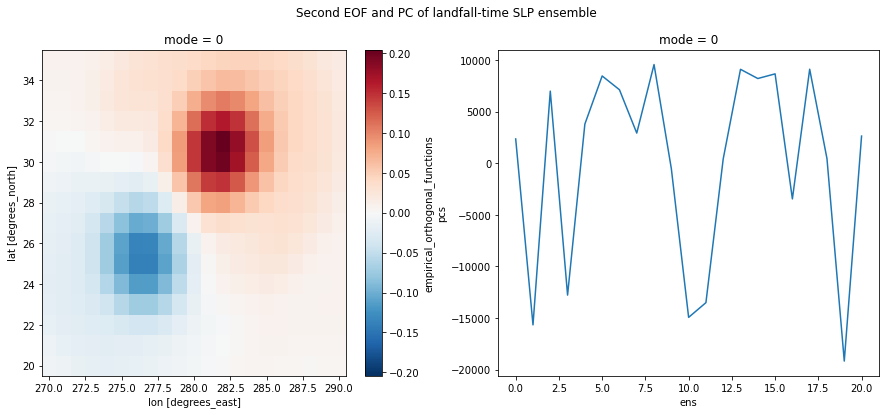

In [11]:
fig, axes = plt.subplots(ncols=2, figsize=(15,6))
fig.suptitle('Second EOF and PC of landfall-time SLP ensemble')
eof.plot(ax=axes[0])
pc.plot(ax=axes[1])

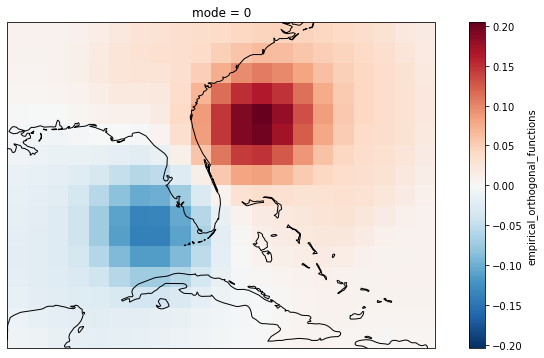

In [16]:
projection = ccrs.PlateCarree()
f, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=[12,6])
eof.plot(ax=ax);
ax.coastlines();

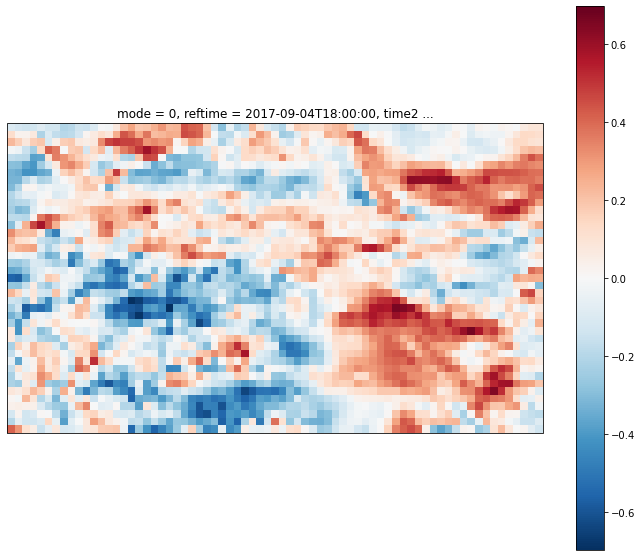

In [19]:
projection = ccrs.PlateCarree()
f, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=[12,10])

bigroi = ds.sel(lon=slice(360-100,360-30), lat=slice(50,10)) 
pccor = xr.corr(pc[:,0], bigroi['u-component_of_wind_height_above_ground_ens'], dim="ens")
pccor[0].plot(ax=ax)

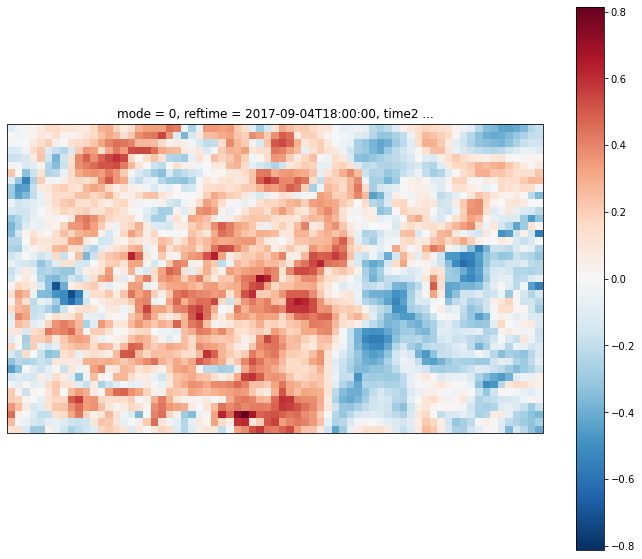

In [30]:
projection = ccrs.PlateCarree()
f, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=[12,10])

bigroi = ds.sel(lon=slice(360-100,360-30), lat=slice(50,10)) 
pccor = xr.corr(pc[:,0], bigroi['v-component_of_wind_height_above_ground_ens'], dim="ens")
pccor[0].plot(ax=ax)

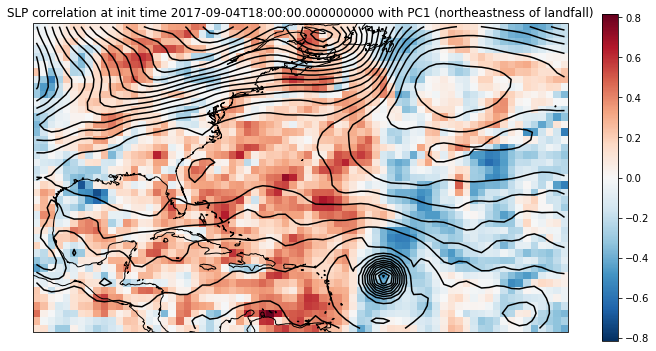

In [34]:
projection = ccrs.PlateCarree()
f, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=[12,6])


pccor[0].plot(ax=ax)

# Overplot ensemble mean SLP so we can interpret correlations 
MSLP = ds_der.Pressure_reduced_to_MSL_msl_unweightedMean.sel(lon=slice(360-100,360-30), lat=slice(50,10))
MSLP[0].plot.contour(colors='k',levels=23)
ax.coastlines();

ax.set_title('SLP correlation at init time '+str(pccor.time2[0].values)+\
             ' with PC1 (northeastness of landfall)');

(array([  73.,  753., 3014., 6198., 8530., 8834., 5416., 1816.,  280.,
          18.]),
 array([-0.72964121, -0.57344397, -0.41724674, -0.2610495 , -0.10485226,
         0.05134498,  0.20754222,  0.36373946,  0.51993669,  0.67613393,
         0.83233117]),
 <BarContainer object of 10 artists>)

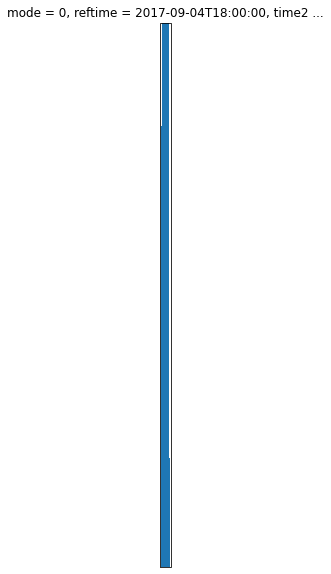

In [36]:
projection = ccrs.PlateCarree()
f, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=[12,10])

bigroi = ds.sel(lon=slice(360-100,360-30), lat=slice(50,10)) 
pccor = xr.corr(pc[:,0], bigroi['v-component_of_wind_isobaric_ens'], dim="ens")
pccor[0].plot(ax=ax)

In [37]:
pccor

<xarray.DataArray (time2: 65, isobaric1: 12, lat: 41, lon: 71)>
array([[[[ 2.57610721e-01,  1.90845045e-01,  1.80151332e-01, ...,
          -9.03495096e-03,  3.51169530e-02,  7.34962539e-02],
         [ 1.44674551e-01,  1.31619280e-01,  1.51570605e-01, ...,
          -7.69626147e-02, -6.36719230e-02, -4.07946708e-02],
         [ 8.87800870e-02,  9.28677067e-02,  7.60918173e-02, ...,
          -1.46907164e-01, -1.33022242e-01, -1.78835598e-01],
         ...,
         [-1.92530709e-01, -1.55686532e-01, -8.21752879e-02, ...,
           1.90209200e-01,  1.97151211e-01,  1.52179329e-01],
         [-2.03282983e-01, -1.56307363e-01, -7.31044320e-02, ...,
           1.55018263e-01,  1.41491892e-01,  1.31138660e-01],
         [-2.17562025e-01, -1.43800348e-01, -1.12472047e-01, ...,
           1.45458879e-01,  1.44740851e-01,  1.51647335e-01]],

        [[ 1.69437837e-01,  2.20571057e-01,  4.18067259e-02, ...,
          -1.95899667e-01, -1.71839759e-01, -2.76614765e-01],
         [ 1.72503595e-01,  1.02844987e-01,  5.34042052e-02, ...,
          -1.95813008e-01, -2.37264796e-01, -2.50455598e-01],
         [-6.34032788e-02, -1.39241630e-01, -1.29537438e-01, ...,
          -2.57619727e-01, -2.91488880e-01, -3.21431586e-01],
...
         [ 2.30545395e-01,  2.92161671e-01,  3.27643003e-01, ...,
          -2.77601463e-01, -2.35129891e-01, -1.79476082e-01],
         [ 2.22055698e-01,  4.15871903e-01,  5.11236404e-01, ...,
          -2.30339731e-01, -2.06368400e-01, -1.62373114e-01],
         [ 3.46179825e-01,  5.62826686e-01,  6.08337289e-01, ...,
          -2.05448996e-01, -1.97546938e-01, -1.83365320e-01]],

        [[ 9.42437792e-02,  1.03075887e-01,  1.04790700e-01, ...,
           2.86868309e-01,  3.00941819e-01,  3.03229461e-01],
         [ 9.62844730e-02,  9.96864055e-02,  6.83513746e-02, ...,
           2.73934705e-01,  2.86628319e-01,  2.87555946e-01],
         [ 8.55263628e-03, -3.15535676e-02, -8.26265364e-02, ...,
           2.77057847e-01,  2.71549368e-01,  2.53564344e-01],
         ...,
         [ 1.46143827e-01,  2.76380134e-01,  3.44779380e-01, ...,
          -2.18950421e-01, -2.07307636e-01, -1.85121360e-01],
         [ 1.26485042e-01,  3.57932445e-01,  5.31903391e-01, ...,
          -2.31076256e-01, -2.01422949e-01, -2.13236214e-01],
         [ 1.98490116e-01,  4.64658110e-01,  5.71419513e-01, ...,
          -2.61638063e-01, -2.27458876e-01, -2.15696586e-01]]]])
Coordinates:
    mode       int32 0
  * lat        (lat) float32 50.0 49.0 48.0 47.0 46.0 ... 13.0 12.0 11.0 10.0
  * lon        (lon) float32 260.0 261.0 262.0 263.0 ... 327.0 328.0 329.0 330.0
    reftime    datetime64[ns] 2017-09-04T18:00:00
  * time2      (time2) datetime64[ns] 2017-09-04T18:00:00 ... 2017-09-20T18:0...
  * isobaric1  (isobaric1) float32 1e+03 5e+03 1e+04 ... 8.5e+04 9.25e+04 1e+05

In [38]:
pccor.sel(time='20170904')

KeyError: 'time is not a valid dimension or coordinate'